<a href="https://colab.research.google.com/github/irma5hourglass/image-classification/blob/main/PALING_TINGGI_SKRIPSI_SCIAN70_78_run1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile,os
local_zip = '/content/drive/MyDrive/SCIAN_Morpho.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
import random
import tensorflow as tf
import numpy as np


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img
import numpy as np

base_dir = '/tmp/SCIAN_Morpho'

# Directories to store the split data
train_dirs = '/tmp/trains'
validation_dirs = '/tmp/validations'
test_dirs = '/tmp/tests'

# Create the directories
os.makedirs(train_dirs, exist_ok=True)
os.makedirs(validation_dirs, exist_ok=True)
os.makedirs(test_dirs, exist_ok=True)

# Classes within the SCIAN_Morpho directory
classes = ['1_Normal', '2_Tapered', '3_Pyriform', '4_Small', '5_Amorphous']
target_count = 656  # Target number of images per class

# ImageDataGenerator for augmentation
augmentor = ImageDataGenerator(rotation_range=20,
                               shear_range=0.2,
                               vertical_flip=True,
                               fill_mode='nearest')

for cls in classes:
    cls_dir = os.path.join(base_dir, cls)
    images = os.listdir(cls_dir)

    # Create subdirectories for each class in train, validation, and test directories
    os.makedirs(os.path.join(train_dirs, cls), exist_ok=True)
    os.makedirs(os.path.join(validation_dirs, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dirs, cls), exist_ok=True)

    train_val_images, test_images = train_test_split(images, test_size=0.05, random_state=42)

    train_images, validation_images = train_test_split(train_val_images, test_size=0.2632, random_state=42)

    # Copy the images to their respective directories
    for image in train_images:
        shutil.copy(os.path.join(cls_dir, image), os.path.join(train_dirs, cls, image))

    for image in validation_images:
        shutil.copy(os.path.join(cls_dir, image), os.path.join(validation_dirs, cls, image))

    for image in test_images:
        shutil.copy(os.path.join(cls_dir, image), os.path.join(test_dirs, cls, image))

    # Get total images in all sets combined
    total_images = len(train_images) + len(validation_images) + len(test_images)

    # Perform augmentation if there are fewer than 656 images in total for the class
    if total_images < target_count:
        print(f"Augmenting {cls} class from {total_images} to {target_count} images.")

        # List of all images (from train, validation, and test) to augment
        all_images = train_images + validation_images + test_images
        i = 0

        while total_images < target_count:
            image_path = os.path.join(cls_dir, all_images[i % len(all_images)])  # Cycle through images

            # Load the image and apply augmentation
            img = load_img(image_path)
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)

            # Generate an augmented image
            aug_iter = augmentor.flow(img_array, batch_size=1)
            aug_img = next(aug_iter)[0].astype('uint8')

            # Save the augmented image
            aug_img_name = f"aug_{i}_{os.path.basename(image_path)}"
            aug_img_path = os.path.join(cls_dir, aug_img_name)
            save_img(aug_img_path, aug_img)

            # Distribute augmented images among train, validation, and test sets
            if len(train_images) < int(target_count * 0.7):
                shutil.copy(aug_img_path, os.path.join(train_dirs, cls, aug_img_name))
                train_images.append(aug_img_name)
            elif len(validation_images) < int(target_count * 0.25):
                shutil.copy(aug_img_path, os.path.join(validation_dirs, cls, aug_img_name))
                validation_images.append(aug_img_name)
            else:
                shutil.copy(aug_img_path, os.path.join(test_dirs, cls, aug_img_name))
                test_images.append(aug_img_name)

            total_images += 1
            i += 1

Augmenting 1_Normal class from 100 to 656 images.
Augmenting 2_Tapered class from 228 to 656 images.
Augmenting 3_Pyriform class from 76 to 656 images.
Augmenting 4_Small class from 72 to 656 images.


In [ ]:
# Count the number of files in each directory
for cls in classes:
    train_count = len(os.listdir(os.path.join(train_dirs, cls)))
    validation_count = len(os.listdir(os.path.join(validation_dirs, cls)))
    test_count = len(os.listdir(os.path.join(test_dirs, cls)))

    print(f"Class: {cls}")
    print(f"  Train: {train_count} files")
    print(f"  Validation: {validation_count} files")
    print(f"  Test: {test_count} files")
    print()

Class: 1_Normal
  Train: 459 files
  Validation: 164 files
  Test: 33 files

Class: 2_Tapered
  Train: 459 files
  Validation: 164 files
  Test: 33 files

Class: 3_Pyriform
  Train: 459 files
  Validation: 164 files
  Test: 33 files

Class: 4_Small
  Train: 459 files
  Validation: 164 files
  Test: 33 files

Class: 5_Amorphous
  Train: 459 files
  Validation: 164 files
  Test: 33 files



In [ ]:
pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training Data Generator with Augmentation
train_datagen = ImageDataGenerator(
                    rescale=1./255)

# Validation Data Generator (only rescaling)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Test Data Generator (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Training Data Generator with Augmentation
train_generator = train_datagen.flow_from_directory(
    train_dirs,
    target_size=(200, 200),
    batch_size=98,
    shuffle=True,
    class_mode='sparse',
    seed=42
)

# Validation Data Generator (only rescaling)
validation_generator = validation_datagen.flow_from_directory(
    validation_dirs,
    target_size=(200, 200),
    batch_size=98,
    shuffle=False,
    class_mode='sparse'
)

# Test Data Generator (only rescaling)
test_generator = test_datagen.flow_from_directory(
    test_dirs,
    target_size=(200, 200),
    shuffle=False,
    batch_size=98,
    class_mode='sparse'
)

Found 2295 images belonging to 5 classes.
Found 820 images belonging to 5 classes.
Found 165 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Define the number of classes in your dataset
num_classes = 5  # Adjust this to match your number of classes

# Create the base pre-trained model
base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom head for your classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)
#x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
#x = Dropout(0.7)(x)  # Adjust dropout rate if needed
x = Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)  # Optionally adjust the size of the dense layer
x = Dropout(0.2)(x)  # Adjust dropout rate if needed
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)


optimizer = Adam(
    learning_rate=0.001,  # Learning rate
    beta_1=0.9,           # First moment decay
    beta_2=0.999,         # Second moment decay
    epsilon=1e-7          # Small constant to avoid division by zero
)

# Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 200, 200, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_4          │ (None, 206, 206, 3)    │              0 │ input_layer_2[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 100, 100, 64)   │          9,408 │ zero_padding2d_4[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 100, 100, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 100, 100, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_5          │ (None, 102, 102, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 50, 50, 64)     │              0 │ zero_padding2d_5[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 50, 50, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 50, 50, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 50, 50, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 50, 50, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 50, 50, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 50, 50, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 50, 50, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 12,669,605 (48.33 MB)

 Trainable params: 26,725 (104.39 KB)

 Non-trainable params: 12,642,880 (48.23 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the number of epochs
epochs = 100  # Adjust the number of epochs as needed

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define ModelCheckpoint callback to save the best model
#checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model with callbacks
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stopping]  # Include both callbacks
)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.2419 - loss: 1.7832 - val_accuracy: 0.4244 - val_loss: 1.4562
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 42s 291ms/step - accuracy: 0.4211 - loss: 1.4262 - val_accuracy: 0.5098 - val_loss: 1.2720
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 323ms/step - accuracy: 0.5052 - loss: 1.2756 - val_accuracy: 0.5988 - val_loss: 1.1573
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 331ms/step - accuracy: 0.5336 - loss: 1.1965 - val_accuracy: 0.6098 - val_loss: 1.0956
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 292ms/step - accuracy: 0.5795 - loss: 1.1348 - val_accuracy: 0.6268 - val_loss: 1.0357
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 355ms/step - accuracy: 0.6191 - loss: 1.0537 - val_accuracy: 0.6207 - val_loss: 0.9958
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 318ms/step - accuracy: 0.5959 - loss: 1.0232 - val_accuracy: 0.6573 - val_loss: 0.9557
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 325ms/step - accuracy: 0.6155 - loss: 0.9979 - val_ac

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

2/2 - 19s - 9s/step - accuracy: 0.7879 - loss: 0.6595

Test Accuracy: 78.79%


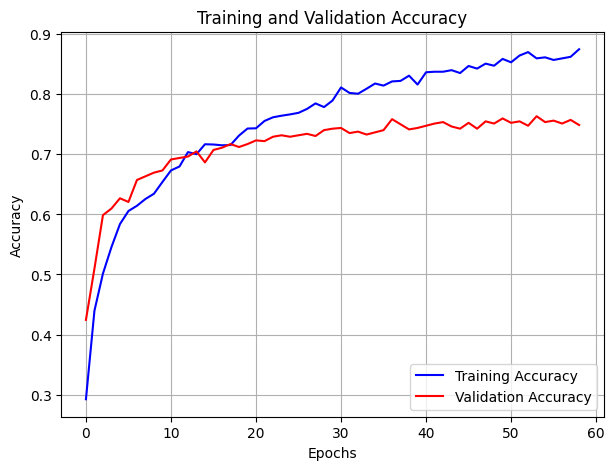

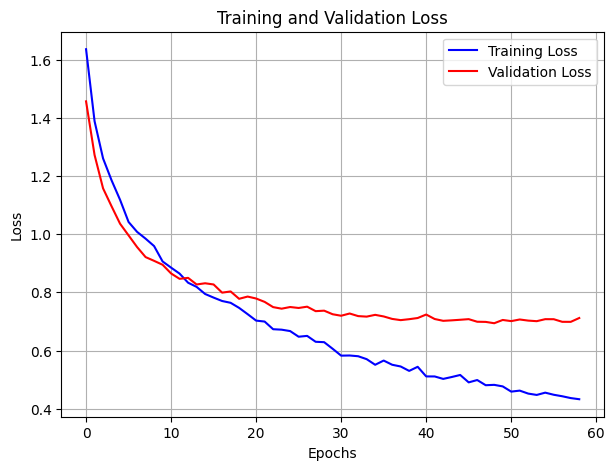

In [ ]:
import matplotlib.pyplot as plt

# Get the class names from the generator
class_names = list(train_generator.class_indices.keys())

# Retrieve a list of accuracy results on training and validation data sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of loss results on training and validation data sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.figure(figsize=(7, 5))
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')  # Position the legend at the lower right
plt.grid(True)  # Adding grid lines for better readability

# Display the plot
plt.show()

# Plot training and validation loss per epoch
plt.figure(figsize=(7, 5))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')  # Position the legend at the upper right
plt.grid(True)  # Adding grid lines for better readability

# Display the plot
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 31s 13s/step


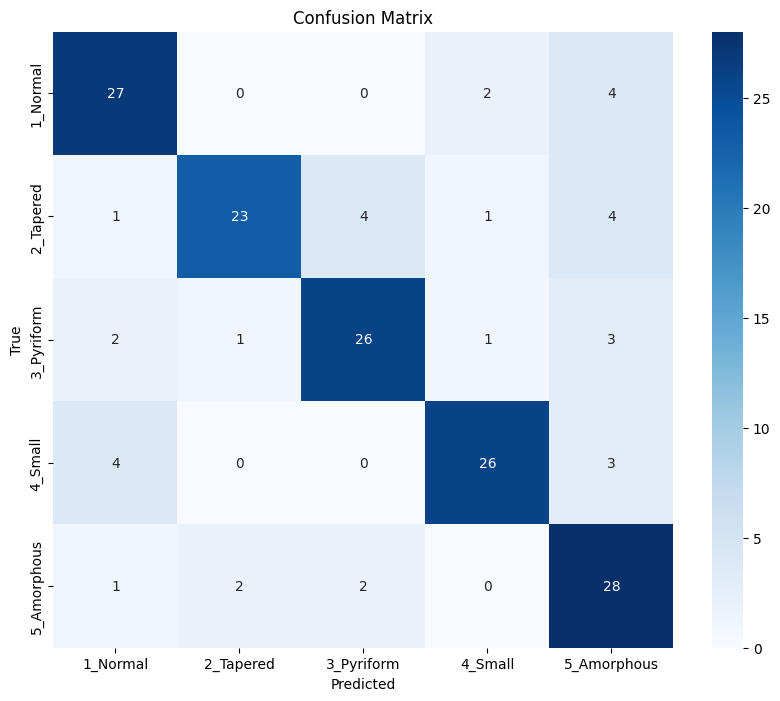

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions from the test set
test_generator.reset()  # Make sure to reset the generator
predictions = model.predict(test_generator, verbose=1)

# Get the true labels
true_labels = test_generator.classes

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=list(range(num_classes)))

# Function to plot confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Define class names (make sure these match the order of classes in your data)
class_names = ['1_Normal', '2_Tapered', '3_Pyriform', '4_Small', '5_Amorphous']

# Plot the confusion matrix
plot_confusion_matrix(cm, class_names)


In [ ]:
import numpy as np
from sklearn.metrics import classification_report


# Reset the test generator to ensure it starts from the beginning
test_generator.reset()

# Generate predictions
predictions = model.predict(test_generator, verbose=1)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels
true_labels = test_generator.classes

# Get class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# Compute classification report
report = classification_report(true_labels, predicted_labels, target_names=class_labels)

# Print the classification report
print(report)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step
              precision    recall  f1-score   support

    1_Normal       0.77      0.82      0.79        33
   2_Tapered       0.88      0.70      0.78        33
  3_Pyriform       0.81      0.79      0.80        33
     4_Small       0.87      0.79      0.83        33
 5_Amorphous       0.67      0.85      0.75        33

    accuracy                           0.79       165
   macro avg       0.80      0.79      0.79       165
weighted avg       0.80      0.79      0.79       165

